In [96]:
import pandas as pd
import glob
import json
import numpy as np
import seaborn as sns
import requests
import matplotlib
import matplotlib.pyplot as plt
import locale # to format currency as USD
from matplotlib.ticker import FuncFormatter # to format currency on charts axis

api_key = '64bc8db1ac9143a7dbb820d7d420ac96'

In [97]:
!ls zippedData

PHASE 1 PROJECT.xlsx
bom.movie_gross.csv.gz
extra files
imdb.name.basics.csv.gz
imdb.title.akas.csv.gz
imdb.title.basics.csv.gz
imdb.title.crew.csv.gz
imdb.title.principals.csv.gz
imdb.title.ratings.csv.gz
rt.movie_info.tsv.gz
rt.reviews.tsv.gz
tmdb.movies.csv.gz
tn.movie_budgets.csv.gz
~$PHASE 1 PROJECT.xlsx


In [98]:
tmdb_df = pd.read_csv('zippedData/tmdb.movies.csv.gz')
tmdb_df = tmdb_df.drop(columns = ['Unnamed: 0'])

In [99]:
tmdb_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [100]:
budget_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
budget_df = budget_df.drop(columns = ['id','release_date'])

In [101]:
budget_df.head()

,movie,production_budget,domestic_gross,worldwide_gross
0,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [102]:
df = tmdb_df.merge(budget_df, left_on='original_title', right_on='movie')

In [103]:
df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,movie,production_budget,domestic_gross,worldwide_gross
0,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,How to Train Your Dragon,"$165,000,000","$217,581,232","$494,870,992"
1,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,Iron Man 2,"$170,000,000","$312,433,331","$621,156,389"
2,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,Toy Story,"$30,000,000","$191,796,233","$364,545,516"
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,Toy Story,"$30,000,000","$191,796,233","$364,545,516"
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,Inception,"$160,000,000","$292,576,195","$835,524,642"


In [104]:
#create function later
# https://www.youtube.com/watch?v=ox_AHkeqNJ0&ab_channel=AbhishekAgarrwal

df['production_budget'] = pd.to_numeric(df['production_budget'].replace('[^0-9\.-]', '', regex=True))
df['domestic_gross'] = pd.to_numeric(df['domestic_gross'].replace('[^0-9\.-]', '', regex=True))
df['worldwide_gross'] = pd.to_numeric(df['worldwide_gross'].replace('[^0-9\.-]', '', regex=True))

In [105]:
df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,movie,production_budget,domestic_gross,worldwide_gross
0,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,How to Train Your Dragon,165000000,217581232,494870992
1,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,Iron Man 2,170000000,312433331,621156389
2,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,Toy Story,30000000,191796233,364545516
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,Toy Story,30000000,191796233,364545516
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,Inception,160000000,292576195,835524642


In [106]:
df['gross_profit'] = df['worldwide_gross'] - df['production_budget']

In [107]:
df.head(20)

df[df['original_title'].str.match('Deepwater Horizon')]

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,movie,production_budget,domestic_gross,worldwide_gross,gross_profit
1835,"[18, 28]",296524,en,Deepwater Horizon,13.685,2016-09-30,Deepwater Horizon,6.7,2606,Deepwater Horizon,156000000,61433527,122603824,-33396176
1836,"[18, 28]",296524,en,Deepwater Horizon,13.685,2016-09-30,Deepwater Horizon,6.7,2606,Deepwater Horizon,156000000,61433527,122603824,-33396176


In [108]:
df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,movie,production_budget,domestic_gross,worldwide_gross,gross_profit
0,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,How to Train Your Dragon,165000000,217581232,494870992,329870992
1,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,Iron Man 2,170000000,312433331,621156389,451156389
2,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,Toy Story,30000000,191796233,364545516,334545516
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,Toy Story,30000000,191796233,364545516,334545516
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,Inception,160000000,292576195,835524642,675524642


In [109]:
response = requests.get('https://api.themoviedb.org/3/genre/movie/list?api_key=' + api_key + '&language=en-US')

# Action          28
# Adventure       12
# Animation       16
# Comedy          35
# Crime           80
# Documentary     99
# Drama           18
# Family          10751
# Fantasy         14
# History         36
# Horror          27
# Music           10402
# Mystery         9648
# Romance         10749
# Science Fiction 878
# TV Movie        10770
# Thriller        53
# War             10752
# Western         37

# print(response.json()['genres'])
print(response.json()['genres'][0])


# case_list = {}
# for entry in entries_list:
#     case = {'key1': value, 'key2': value, 'key3':value }
#     case_list.update(case)

genre_dict = {}
all_genres = []

for genre in response.json()['genres']:
    genre_add = {genre['id'] : genre['name']}
    genre_dict.update(genre_add)
    all_genres.append(genre['name'])
print(genre_dict)
print(all_genres)

{'id': 28, 'name': 'Action'}
{28: 'Action', 12: 'Adventure', 16: 'Animation', 35: 'Comedy', 80: 'Crime', 99: 'Documentary', 18: 'Drama', 10751: 'Family', 14: 'Fantasy', 36: 'History', 27: 'Horror', 10402: 'Music', 9648: 'Mystery', 10749: 'Romance', 878: 'Science Fiction', 10770: 'TV Movie', 53: 'Thriller', 10752: 'War', 37: 'Western'}
['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']


In [110]:
genre_df = df

In [111]:
genre_list = []

for row in genre_df['genre_ids']:
    if row == '[]':
        row = ['None']
        genre_list.append(row)
    else:
        # https://stackoverflow.com/questions/19334374/python-converting-a-string-of-numbers-into-a-list-of-int
        row = [int(s) for s in str(row).replace('[', '').replace(']', '').split(', ')] 
        row = [genre_dict[x] for x in row]

        
        genre_list.append(row)
genre_list

[['Fantasy', 'Adventure', 'Animation', 'Family'],
 ['Adventure', 'Action', 'Science Fiction'],
 ['Animation', 'Comedy', 'Family'],
 ['Animation', 'Comedy', 'Family'],
 ['Action', 'Science Fiction', 'Adventure'],
 ['Adventure', 'Fantasy', 'Family'],
 ['Action', 'Adventure', 'Fantasy', 'Science Fiction'],
 ['Animation', 'Family', 'Comedy'],
 ['Animation', 'Family', 'Comedy'],
 ['Animation', 'Action', 'Comedy', 'Family', 'Science Fiction'],
 ['Animation', 'Comedy', 'Family'],
 ['Animation', 'Comedy', 'Family'],
 ['Family', 'Fantasy', 'Adventure'],
 ['Family', 'Fantasy', 'Adventure'],
 ['None'],
 ['None'],
 ['Thriller', 'Adventure', 'Action'],
 ['Animation', 'Family'],
 ['Horror', 'Crime'],
 ['Adventure', 'Fantasy', 'Drama', 'Romance'],
 ['Action', 'Thriller', 'Science Fiction'],
 ['Action', 'Drama', 'Thriller'],
 ['Drama', 'Thriller', 'Mystery'],
 ['Action', 'Drama', 'Mystery', 'Thriller'],
 ['Action', 'Comedy'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Drama', 'Romance'],
 ['Thriller', 'A

In [112]:
genre_df['genre_ids'] = genre_list
genre_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,movie,production_budget,domestic_gross,worldwide_gross,gross_profit
0,"[Fantasy, Adventure, Animation, Family]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,How to Train Your Dragon,165000000,217581232,494870992,329870992
1,"[Adventure, Action, Science Fiction]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,Iron Man 2,170000000,312433331,621156389,451156389
2,"[Animation, Comedy, Family]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,Toy Story,30000000,191796233,364545516,334545516
3,"[Animation, Comedy, Family]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,Toy Story,30000000,191796233,364545516,334545516
4,"[Action, Science Fiction, Adventure]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,Inception,160000000,292576195,835524642,675524642


In [113]:
df = genre_df

In [122]:
df.explode('genre_ids').groupby('genre_ids').mean().round()

,id,popularity,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross,gross_profit
genre_ids,,,,,,,,
Action,181866.0,16.0,6.0,3130.0,76390702.0,88466941.0,237816622.0,161425920.0
Adventure,179943.0,18.0,6.0,4058.0,102023715.0,120892196.0,341304504.0,239280789.0
Animation,195672.0,14.0,6.0,2726.0,84013103.0,129230956.0,339891260.0,255878157.0
Comedy,187101.0,11.0,6.0,1570.0,35983860.0,55114649.0,123902202.0,87918342.0
Crime,185043.0,12.0,6.0,1766.0,34254843.0,40120920.0,94709741.0,60454898.0
Documentary,259271.0,2.0,7.0,46.0,19630517.0,22199842.0,50108778.0,30478261.0
Drama,211776.0,10.0,6.0,1449.0,25655013.0,32708969.0,72509128.0,46854115.0
Family,179950.0,14.0,6.0,2573.0,77103829.0,111131245.0,286582124.0,209478295.0
Fantasy,172471.0,17.0,6.0,3527.0,89283333.0,111256486.0,304967052.0,215683719.0


In [33]:
# https://stackoverflow.com/questions/22005911/convert-columns-to-string-in-pandas
df['genre_ids'] = df['genre_ids'].astype(str)
df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,movie,production_budget,domestic_gross,worldwide_gross,gross_profit
0,"['Fantasy', 'Adventure', 'Animation', 'Family']",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,How to Train Your Dragon,165000000,217581232,494870992,329870992
1,"['Adventure', 'Action', 'Science Fiction']",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,Iron Man 2,170000000,312433331,621156389,451156389
2,"['Animation', 'Comedy', 'Family']",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,Toy Story,30000000,191796233,364545516,334545516
3,"['Animation', 'Comedy', 'Family']",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,Toy Story,30000000,191796233,364545516,334545516
4,"['Action', 'Science Fiction', 'Adventure']",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,Inception,160000000,292576195,835524642,675524642


In [94]:
import json

In [95]:
df['genre_list'] = df['genre_ids'].map(json.loads)

df.explode('genre_list').groupby('genre_list')

JSONDecodeError: Expecting value: line 1 column 2 (char 1)

In [75]:
df[df['genre_ids'].str.contains('Music')]

genre_count = []
avg_production_budget = []
avg_domestic_gross = []
avg_worldwide_gross = []
avg_gross_profit = []

columns = ['genre_name','genre_count', 'production_budget_avg', 'domestic_gross_avg', 
           'worldwide_gross_avg', 'gross_profit_avg']
    
all_genre_df = pd.DataFrame(columns = columns)

for genre in all_genres:
    genre_df = df[df['genre_ids'].str.contains(genre)]
    genre_count.append(genre_df['title'].count())
    avg_production_budget.append(genre_df['production_budget'].mean())
    avg_domestic_gross.append(genre_df['domestic_gross'].mean())
    avg_worldwide_gross.append(genre_df['worldwide_gross'].mean())
    avg_gross_profit.append(genre_df['gross_profit'].mean())

all_genre_df['genre_name'] = all_genres
all_genre_df['genre_count'] = genre_count
all_genre_df['production_budget_avg'] = avg_production_budget
all_genre_df['domestic_gross_avg'] = avg_domestic_gross
all_genre_df['worldwide_gross_avg'] = avg_worldwide_gross
all_genre_df['gross_profit_avg'] = avg_gross_profit

# all_genre_df['all_genres'] = all_genres


all_genre_df = all_genre_df.round(1)
all_genre_df.head()

,genre_name,genre_count,production_budget_avg,domestic_gross_avg,worldwide_gross_avg,gross_profit_avg
0,Action,534,76390702.2,88466940.7,237816621.8,161425919.6
1,Adventure,362,102023715.5,120892196.0,341304504.4,239280789.0
2,Animation,145,84013103.4,129230956.5,339891260.0,255878156.5
3,Comedy,656,35983860.0,55114648.7,123902201.7,87918341.7
4,Crime,287,34254843.2,40120919.7,94709741.1,60454897.9


In [92]:
# all_genre_df['profit_test'] = all_genre_df['worldwide_gross_avg'] - all_genre_df['production_budget_avg']

all_genre_df

,genre_name,genre_count,production_budget_avg,domestic_gross_avg,worldwide_gross_avg,gross_profit_avg,profit_test
0,Action,534,76390702.2,88466940.7,237816621.8,161425919.6,161425919.6
1,Adventure,362,102023715.5,120892196.0,341304504.4,239280789.0,239280788.9
2,Animation,145,84013103.4,129230956.5,339891260.0,255878156.5,255878156.6
3,Comedy,656,35983860.0,55114648.7,123902201.7,87918341.7,87918341.7
4,Crime,287,34254843.2,40120919.7,94709741.1,60454897.9,60454897.9
5,Documentary,86,19277383.7,21910079.9,49806329.3,30528945.6,30528945.6
6,Drama,1057,25655012.9,32708969.2,72509127.9,46854114.9,46854115.0
7,Family,222,77103828.8,111131244.6,286582124.3,209478295.4,209478295.5
8,Fantasy,219,89283333.3,111256486.0,304967052.2,215683718.8,215683718.9
9,History,89,30025842.7,31536518.6,64095403.4,34069560.7,34069560.7


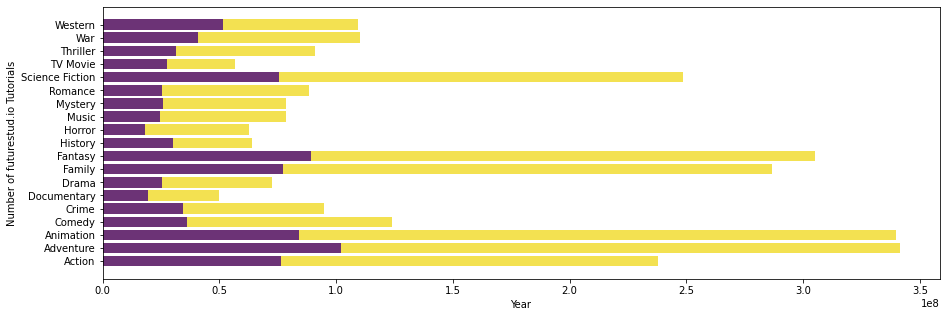

In [123]:
# https://futurestud.io/tutorials/matplotlib-stacked-bar-plots
# the first call is as usual
genre_name = all_genre_df['genre_name']
production_budget_avg = all_genre_df['production_budget_avg']
gross_profit_avg = all_genre_df['gross_profit_avg']

plt.figure(figsize = (15,5))
plt.barh(genre_name, production_budget_avg, color="#6c3376") #average profit

# the second one is special to create stacked bar plots
plt.barh(genre_name, gross_profit_avg, left=production_budget_avg, color="#f3e151")

plt.xlabel('Year')  
plt.ylabel('Number of futurestud.io Tutorials')

plt.show()  

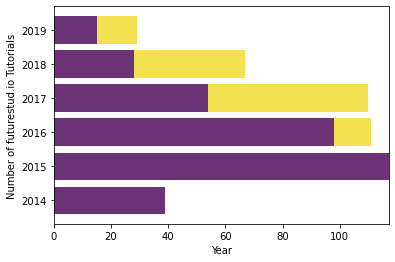

In [83]:
year = [2014, 2015, 2016, 2017, 2018, 2019]  
tutorial_public =  [39, 117, 98, 54, 28, 15]  
tutorial_premium = [ 0,   0, 13, 56, 39, 14]  

plt.barh(year, tutorial_public, color="#6c3376")

# the second one is special to create stacked bar plots
plt.barh(year, tutorial_premium, left=tutorial_public, color="#f3e151")

plt.xlabel('Year')  
plt.ylabel('Number of futurestud.io Tutorials')

plt.show()  